# Airbnb Investment in Melbourne, Australia

### Smart property investment using data science and machine learning

#### Applied Data Science Capstone Project by IBM/Coursera

##### 19/01/2020


## Introduction : Business problem <a name="introduction"></a>

**Airbnb** has become one of the biggest players in the world's holiday accommodation industry. It exists in **more than 65,000 cities across 190+ countries all over the world**.

**Infik** published in 2019, the list of the top Airbnb cities, based on **AirDNA** database. The city of Melbourne was number 10 with 19.055 Airbnb Listings.

As the sporting and cultural capital of Australia, Melbourne has so much to offer visitors from all over the world. It is a culturally diverse city offering some of the best living standards throughout Australia.

This is where I decided to capitalize on the short-term rental demand created by Airbnb.

The study is part of 'The Battle of Neighborhoods' Coursera Applied data science capstone project. It concludes the wonderful IBM Data science Professional Certificate set of courses, which I highly recommand to anyone who is into data science and Machine Learning.

My task is to understand the revenue potential of short-term vacation in Melbourne, and explore the performance of specific neighborhoods. 

The main questions will be : 

* Are there any clusters of similar neighborhoods in Melbourne ?
* Where should I invest ? Is there any significant relationship between cluster and housing price ?
* What are the significant caracteristics that allow us to predict the property price ? And what confidence level do we have in our model ?
* Are there any specific features that can help us maximize the rental revenues ?

At the end, I would like to share with ou my insights, being able, to estimate the right price versus the estimated annual rental revenue.

## Data <a name="data"></a>

### Melbourne Housing Market

**Melbourne_housing_FULL** : The dataset was taken from Kaggle. The data was scraped from publicly available results posted every week from **Domain.com.au**. It was cleaned by Tony Pino and last updated in august 2018. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

The features are :
* **_Suburb_**
* **_Address_**
* **_Rooms_**: Number of rooms
* **_Price_**: Price in Australian dollars
* **_Method_**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
* **_Type_**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
* **_SellerG_**: Real Estate Agent
* **_Date_**: Date sold
* **_Postcode_**
* **_Distance_**: Distance from CBD in Kilometres
* **_Regionname_**: General Region (West, North West, North, North east ...etc)
* **_Propertycount_**: Number of properties that exist in the suburb.
* **_Bedroom2_** : Scraped # of Bedrooms (from different source)
* **_Bathroom_**: Number of Bathrooms
* **_Car_**: Number of carspots
* **_Landsize_**: Land Size in Metres
* **_BuildingArea_**: Building Size in Metres
* **_YearBuilt_**: Year the house was built
* **_CouncilArea_**: Governing council for the area
* **_Lattitude_**
* **_Longtitude_**

The Melbourne Housing dataset has :
* **34857** houses sold,
* across **211** suburbs,
* with an average price of : **$1050173**,
* with **21** features

### Melbourne Airbnb Open Data

**cleansed_listings_dec18** : The dataset was also taken from Kaggle and is originally part of Inside Airbnb. This an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world.
The original raw csv file has eighty-four (84) columns, some of which won't be needed for analysis such as host_url, host_about, access, interaction, summary, mainly *strings* describing the listings.

The original raw csv file is quite big and has **eighty-four** (84) columns, some of which won't be needed for analysis such as host_url, host_about, access, interaction, summary, mainly strings describing the listings.

After cleaning the dataset, keeping all relevant features, the Greater Melbourne area had:
* **22,895** listings,
* across **247** suburbs,
* hosted by **14,988** hosts,
* with an average nightly rate at **$148**.
* with **33** features left.

To answer the questions, I propose to generate three new features, for each listing :
* **_occupancy_rate_**
* **_nights_per_year_**
* **_income_per_month_**

based on **_minimum_nights_** , **_price_**, **_number_of_reviews_**, **_first_review_** and **_last_review_**, making some assumptions described later in this project.

### Exploring neighborhoods using Foursquare API

The **clustering** part of our project will be based on a list of **zip codes** extracted from both dataframes.

We can notice that the info is stored in the **_Postcode_** column in **_housing_df_** dataframe. It is stored in the **_zipcode_** column in **_airbnb_df_** dataframe.

We will use the **_airbnb_df_** zip codes, as they seem to include the **_housing_df_** ones. (**236** vs. **199**).

### import libraries and data

In [6]:
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import geocoder # import geocoders
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium
import requests # library to handle requests

In [7]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b80010563ad347059cff30c3cec0a156 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oh5wyNo2cgGBGYqkJO6Q9NQywaIwos-ugzBgO-mirBBp',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    ibm_service_instance_id="crn:v1:bluemix:public:cloud-object-storage:global:a/1865179cfd564665ad6da33257a4e3c6:b8001056-3ad3-4705-9cff-30c3cec0a156::",                                                       
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.us.cloud-object-storage.appdomain.cloud')

body = client_b80010563ad347059cff30c3cec0a156.get_object(Bucket='airbnbinvestmentinmelbourneaustra-donotdelete-pr-u7czrdfljykae0',Key='airbnb_clean.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [8]:
airbnb_df = pd.read_csv(body)
airbnb_df.head()

id                                               name         suburb  \
0  12936   St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC       St Kilda   
1  38271                 Melbourne - Old Trafford Apartment        Berwick   
2  43429  Tranquil Javanese-Style Apartment in Oakleigh ...  Oakleigh East   
3  50492  St Kilda Central LUXE 2BR APT+TWO COURTYARDS+WIFI       St Kilda   
4  62606                               A Room Near the Park      Melbourne   

   zipcode            smart_location   latitude   longitude property_type  \
0     3182       St Kilda, Australia -37.859755  144.977369     Apartment   
1     3806        Berwick, Australia -38.057254  145.339356     Apartment   
2     3166  Oakleigh East, Australia -37.899601  145.114475     Apartment   
3     3182       St Kilda, Australia -37.861275  144.980379     Apartment   
4     3187      Melbourne, Australia -37.928173  145.025176         House   

         room_type  accommodates  ...  first_review  last_review  \
0  Entire home/apt             3  ...    2010-08-04   2018-11-07   
1  Entire home/apt             5  ...    2010-11-24   2018-12-01   
2  Entire home/apt             2  ...    2010-12-05   2018-12-03   
3  Entire home/apt             4  ...    2012-11-30   2018-12-02   
4     Private room             2  ...    2011-03-05   2018-11-29   

   review_scores_rating          cancellation_policy  reviews_per_month  \
0                  94.0  strict_14_with_grace_period               0.15   
1                  97.0                     flexible               1.14   
2                  97.0                     moderate               1.72   
3                  97.0  strict_14_with_grace_period               0.60   
4                  84.0                     moderate               0.22   

   min_night_per_month  min_night_per_year occupancy_rate min_income_per_year  \
0             0.642857            7.714286       0.023663         1226.571429   
1             1.628571           19.542857       0.059582         1915.200000   
2             4.914286           58.971429       0.190230         5779.200000   
3             2.571429           30.857143       0.097649         5862.857143   
4             0.628571            7.542857       0.022997          377.142857   

   min_income_per_month  
0            102.214286  
1            159.600000  
2            481.600000  
3            488.571429  
4             31.428571  

[5 rows x 27 columns]

In [9]:
print('Number of listings: ', airbnb_df.shape[0])
print('Number of features in dataset: ', airbnb_df.shape[1])
print('Average price at: ${}'.format(round(airbnb_df.price.mean())))
print('Number of suburbs: ',airbnb_df.zipcode.nunique())

Number of listings:  17492
Number of features in dataset:  27
Average price at: $137.0
Number of suburbs:  236


In [10]:
body = client_b80010563ad347059cff30c3cec0a156.get_object(Bucket='airbnbinvestmentinmelbourneaustra-donotdelete-pr-u7czrdfljykae0',Key='housing_clean.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

housing_df = pd.read_csv(body)
housing_df.head()

Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
1  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
2  Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
3  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
4  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  2016-04-02       2.5      3067  ...         1    0     156.0          79.0   
1  2017-04-03       2.5      3067  ...         2    0     134.0         150.0   
2  2016-04-06       2.5      3067  ...         1    2     120.0         142.0   
3  2016-07-05       2.5      3067  ...         2    0     245.0         210.0   
4  2016-08-10       2.5      3067  ...         1    2     256.0         107.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0       1900  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
1       1900  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   
2       2014  Yarra City Council  -37.8072    144.9941  Northern Metropolitan   
3       1910  Yarra City Council  -37.8024    144.9993  Northern Metropolitan   
4       1890  Yarra City Council  -37.8060    144.9954  Northern Metropolitan   

  Propertycount  
0          4019  
1          4019  
2          4019  
3          4019  
4          4019  

[5 rows x 21 columns]

In [11]:
print('Number of houses: ', housing_df.shape[0])
print('Number of features in dataset: ', housing_df.shape[1])
print('Average price at: ${}'.format(round(housing_df.Price.mean())))
print('Number of suburbs: ',housing_df.Postcode.nunique())

Number of houses:  10502
Number of features in dataset:  21
Average price at: $1088148.0
Number of suburbs:  199


In [12]:
airbnb_df.describe()

id       zipcode      latitude     longitude  accommodates  \
count  1.749200e+04  17492.000000  17492.000000  17492.000000  17492.000000   
mean   1.771645e+07   3114.944375    -37.825612    145.008702      3.519666   
std    7.871652e+06    264.639852      0.065365      0.129127      2.194898   
min    9.835000e+03   2010.000000    -38.224427    144.531993      1.000000   
25%    1.187326e+07   3006.000000    -37.849747    144.957247      2.000000   
50%    1.908679e+07   3067.000000    -37.816785    144.977242      3.000000   
75%    2.361826e+07   3161.000000    -37.803197    145.007922      4.000000   
max    3.054094e+07  30122.000000    -37.486284    145.831408     16.000000   

          bathrooms      bedrooms          beds         price  minimum_nights  \
count  17492.000000  17492.000000  17492.000000  17492.000000    17492.000000   
mean       1.232106      1.527327      2.027155    136.887091        2.127087   
std        0.513365      0.910617      1.511341    106.254111        1.491126   
min        0.000000      0.000000      1.000000     12.000000        1.000000   
25%        1.000000      1.000000      1.000000     71.000000        1.000000   
50%        1.000000      1.000000      2.000000    114.000000        2.000000   
75%        1.000000      2.000000      2.000000    161.000000        2.000000   
max        8.000000     10.000000     20.000000    999.000000       10.000000   

       availability_365  number_of_reviews  review_scores_rating  \
count      17492.000000       17492.000000          17492.000000   
mean         270.740567          27.670135             94.255660   
std          115.957131          42.515945              8.452414   
min            3.000000           1.000000             20.000000   
25%          162.000000           3.000000             93.000000   
50%          338.000000          11.000000             97.000000   
75%          365.000000          33.000000            100.000000   
max          365.000000         538.000000            100.000000   

       reviews_per_month  min_night_per_month  min_night_per_year  \
count       17492.000000         17492.000000        17492.000000   
mean            1.593622             3.850335           46.204018   
std             1.722104             3.955892           47.470704   
min             0.010000             0.028571            0.342857   
25%             0.310000             0.857143           10.285714   
50%             1.000000             2.500000           30.000000   
75%             2.300000             5.714286           68.571429   
max            14.540000            29.700000          356.400000   

       occupancy_rate  min_income_per_year  min_income_per_month  
count    17492.000000         17492.000000          17492.000000  
mean         0.223188          6338.555150            526.767374  
std          0.228944          8594.742815            706.870352  
min          0.000939             7.200000              0.600000  
25%          0.040661          1002.428571             83.535714  
50%          0.144412          3290.400000            274.200000  
75%          0.331643          8514.514286            709.464286  
max          0.999392        145530.000000          12127.500000

### Step 1 : Zipcode dataframe preparation

Let us prepare the zipcode dataframe, for our neigbourhood clustering. As stated before, we use the airbnb dataframe.

In [13]:
airbnb_zip_df = airbnb_df[['zipcode', 'suburb']]

we drop suburb duplicates :

In [14]:
airbnb_zip_df1 = airbnb_zip_df.drop_duplicates()

and join the suburbs with the same zipcode in one string.

In [15]:
airbnb_zip_df2 = airbnb_zip_df1.groupby(['zipcode'])['suburb'].apply(lambda x: "%s" % ', '.join(x)).to_frame().reset_index()

airbnb_zip_df2.head(20)

zipcode                                             suburb
0      2010                                       Malvern East
1      3000  Melbourne, 墨爾本 Melbourne, Melbourne City, Melb...
2      3001                                          Melbourne
3      3002          Melbourne, East Melbourne, West Melbourne
4      3003  West Melbourne, Victoria, Melbourne, West Melb...
5      3004  Melbourne, St Kilda, Saint Kilda, South Melbou...
6      3006  Southbank, Melbourne, Southbank, Melbourne, So...
7      3008     Docklands, Melbourne, VIC, Dockland, Southbank
8      3011                                  Footscray, Seddon
9      3012  Maidstone, West Footscray, Kingsville, Footscr...
10     3013                                         Yarraville
11     3015    Newport, Spotswood, South Kingsville, Melbourne
12     3016                   Williamstown, Williamstown North
13     3018                        Altona, Melbourne, Seaholme
14     3019                                          Braybrook
15     3020  Sunshine, Sunshine West, Sunshine North, Albio...
16     3021                   Kealba, Saint Albans, Kings Park
17     3023  Caroline Springs, Melbourne, Victoria, AU, Cai...
18     3024                       Wyndham Vale, Mount Cottrell
19     3025                                       Altona North

### Step 2  : latitude and longitude retrieval

Now let's try the geocoder module on a random postcode, to see if the coordinates are retieved :

In [16]:
postal_code = '6791'

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
#while(lat_lng_coords is None):

g = geocoder.arcgis('{}, Melbourne, Victoria'.format(postal_code))
  
lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

print(lat_lng_coords)

[-37.81738999999993, 144.96751000000006]


It is working. So let's now loop on all the postal codes :

In [17]:
postal_code_col = airbnb_zip_df2['zipcode']

n = airbnb_zip_df2.shape[0]

for postal_code , index in zip(postal_code_col , range(n)) :
    
    lat_lng_coords = None
    
    # loop until you get the coordinates
    
    while(lat_lng_coords is None):

        g = geocoder.arcgis('{}, Melbourne, Australia'.format(postal_code))
  
        lat_lng_coords = g.latlng

    airbnb_zip_df2.loc[ index , 'Latitude'] = lat_lng_coords[0]
    
    airbnb_zip_df2.loc[ index , 'Longitude'] = lat_lng_coords[1]

airbnb_zip_df2.head(235)

zipcode                                             suburb   Latitude  \
0       2010                                       Malvern East -37.817390   
1       3000  Melbourne, 墨爾本 Melbourne, Melbourne City, Melb... -37.810993   
2       3001                                          Melbourne -37.817390   
3       3002          Melbourne, East Melbourne, West Melbourne -37.815425   
4       3003  West Melbourne, Victoria, Melbourne, West Melb... -37.809103   
..       ...                                                ...        ...   
230     3978                              Cardinia, Clyde North -38.076731   
231     3980                                  Tooradin, Warneet -37.817390   
232     3981                                             Bayles -38.202890   
233     5203                             Wheelers Hill VIC 3150 -37.817390   
234     6791                               South Yarra VIC 3141 -37.817390   

      Longitude  
0    144.967510  
1    144.964485  
2    144.967510  
3    144.982591  
4    144.921020  
..          ...  
230  145.353056  
231  144.967510  
232  145.635762  
233  144.967510  
234  144.967510  

[235 rows x 4 columns]

Another way to get the coordinates is by using **Nominatim**. It works with a full adress and not a zipcode only :

In [18]:
address = 'Melbourne, Australia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


We map the retrieved zipcode points based on their coordinates :

In [19]:
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(airbnb_zip_df2['Latitude'], airbnb_zip_df2['Longitude'], airbnb_zip_df2['suburb']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne

### Step 3  : venues GET request

Now, at the stage, we can define a function which goal is to retrieve the list of venues by a specific GET request to th Foursquare API.

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
CLIENT_ID = 'OCRRO3JAEHFG4FAAK5GMADMYD2ZIGZYAEQFST1UNRNMBA2DS' # your Foursquare ID
CLIENT_SECRET = 'D4WBCUPRH3G2SLV4YR00OVU45BJID5141YBOSSIO5K3VX4BV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

melbourne_venues = getNearbyVenues(names=airbnb_zip_df2['suburb'],
                                   latitudes=airbnb_zip_df2['Latitude'],
                                   longitudes=airbnb_zip_df2['Longitude']
                                  )

Malvern East
Melbourne, 墨爾本 Melbourne, Melbourne City, Melbourne Victoria, Victoria, Docklands, Melborne, melbourne, Melbourne CBD
Melbourne
Melbourne, East Melbourne, West Melbourne
West Melbourne, Victoria, Melbourne, West Melbourne - flagstaff
Melbourne, St Kilda, Saint Kilda, South Melbourne, South Yarra
Southbank, Melbourne, Southbank, Melbourne, Southbank Melbourne, South Wharf, Collingwood, South Melbourne, Southbank, Victoria, AU, Docklands
Docklands, Melbourne, VIC, Dockland, Southbank
Footscray, Seddon
Maidstone, West Footscray, Kingsville, Footscray, Brooklyn, Melbourne
Yarraville
Newport, Spotswood, South Kingsville, Melbourne
Williamstown, Williamstown North
Altona, Melbourne, Seaholme
Braybrook
Sunshine, Sunshine West, Sunshine North, Albion, Brimbank City
Kealba, Saint Albans, Kings Park
Caroline Springs, Melbourne, Victoria, AU, Cairnlea, Deer Park, Burnside Heights
Wyndham Vale, Mount Cottrell
Altona North
Williams Landing
Seabrook, Altona Meadows, Laverton
Truganina, 

The function worked perfectly ! We retrieved a list of **3664** venues, with 280 unique categories, in the **melbourne_venues** dataframe. 

In [23]:
print(melbourne_venues.shape)
melbourne_venues.head(200)

(3664, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Malvern East              -37.81739               144.96751   
1    Malvern East              -37.81739               144.96751   
2    Malvern East              -37.81739               144.96751   
3    Malvern East              -37.81739               144.96751   
4    Malvern East              -37.81739               144.96751   
..            ...                    ...                     ...   
195     Melbourne              -37.81739               144.96751   
196     Melbourne              -37.81739               144.96751   
197     Melbourne              -37.81739               144.96751   
198     Melbourne              -37.81739               144.96751   
199     Melbourne              -37.81739               144.96751   

                                    Venue  Venue Latitude  Venue Longitude  \
0                       Federation Square      -37.817996       144.968194   
1                      Pidapipó Gelateria      -37.817715       144.965997   
2                         Degraves Street      -37.816994       144.965673   
3                           Roule Galette      -37.816779       144.966295   
4                             Hosier Lane      -37.816328       144.969012   
..                                    ...             ...              ...   
195                Fitness First Platinum      -37.817944       144.965260   
196  The Ian Potter Centre: NGV Australia      -37.817421       144.969653   
197                    Lune Croissanterie      -37.815514       144.969415   
198                          Cup Of Truth      -37.816930       144.965726   
199                                  Coda      -37.815625       144.969906   

            Venue Category  
0                    Plaza  
1           Ice Cream Shop  
2                     Road  
3                 Creperie  
4               Street Art  
..                     ...  
195                    Gym  
196            Art Gallery  
197                 Bakery  
198            Coffee Shop  
199  Vietnamese Restaurant  

[200 rows x 7 columns]

Let  us now have a look to how many venues we get for each neighborhood :

In [24]:
melbourne_venues.groupby('Neighborhood').count().head(25)

Neighborhood Latitude  \
Neighborhood                                                                
Abbotsford, Abbotsford, Melbourne                                      19   
Airport West, Keilor Park, Niddrie, Melbourne                           2   
Alphington, Fairfield                                                   4   
Altona North                                                            1   
Altona, Melbourne, Seaholme                                             2   
Armadale, Armadale North                                               10   
Ashwood, Ashburton                                                     15   
Avondale Heights                                                        4   
Balaclava, St Kilda East, Melbourne, Saint Kild...                     14   
Balwyn                                                                 19   
Balwyn North                                                            4   
Bayswater, Bayswater North                                              4   
Beaumaris, Black Rock                                                   4   
Belgrave, Belgrave Heights, Tecoma                                      2   
Bentleigh East                                                          4   
Bentleigh, Ormond, Melbourne, McKinnon                                 27   
Berwick, Harkaway                                                      17   
Blackburn South, Blackburn, Blackburn North                            11   
Bonbeach, Chelsea, Edithvale, Chelsea Heights                           5   
Boronia                                                                16   
Box Hill, Box Hill South                                                5   
Braybrook                                                               5   
Broadmeadows, Jacana, Dallas                                            3   
Brunswick East, Melbourne, Brunswick East, Melb...                      8   
Brunswick West, Brunswick West, Melbourne, Brun...                     10   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Abbotsford, Abbotsford, Melbourne                                       19   
Airport West, Keilor Park, Niddrie, Melbourne                            2   
Alphington, Fairfield                                                    4   
Altona North                                                             1   
Altona, Melbourne, Seaholme                                              2   
Armadale, Armadale North                                                10   
Ashwood, Ashburton                                                      15   
Avondale Heights                                                         4   
Balaclava, St Kilda East, Melbourne, Saint Kild...                      14   
Balwyn                                                                  19   
Balwyn North                                                             4   
Bayswater, Bayswater North                                               4   
Beaumaris, Black Rock                                                    4   
Belgrave, Belgrave Heights, Tecoma                                       2   
Bentleigh East                                                           4   
Bentleigh, Ormond, Melbourne, McKinnon                                  27   
Berwick, Harkaway                                                       17   
Blackburn South, Blackburn, Blackburn North                             11   
Bonbeach, Chelsea, Edithvale, Chelsea Heights                            5   
Boronia                                                                 16   
Box Hill, Box Hill South                                                 5   
Braybrook                                                                5   
Broadmeadows, Jacana, Dallas                                             3   
Brunswick East, Melbou

In [25]:
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))

There are 273 uniques categories.


### Step 4  : dataframe preparation to clustering

We can now proceed to clustering the neighborhoods based on their most frequented venues.

In [26]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

We now give the dataframe the right format to extract information, and calculate distances. We perform a one hot encoding on it, so as to have the **277 unique categories** as **columns**.

In [27]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# move neighborhood column at the first column

melbourne_onehot['Neighborhood'] = melbourne_venues['Neighborhood']

cols = list(melbourne_onehot) # list of columns

# move the column to head of list using index, pop and insert

cols.insert(0, cols.pop(cols.index('Neighborhood')))

melbourne_onehot = melbourne_onehot.loc[:, cols]

melbourne_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0  Malvern East                  0                   0                    0   
1  Malvern East                  0                   0                    0   
2  Malvern East                  0                   0                    0   
3  Malvern East                  0                   0                    0   
4  Malvern East                  0                   0                    0   

   Antique Shop  Arcade  Art Gallery  Arts & Crafts Store  \
0             0       0            0                    0   
1             0       0            0                    0   
2             0       0            0                    0   
3             0       0            0                    0   
4             0       0            0                    0   

   Arts & Entertainment  Asian Restaurant  ...  Video Store  \
0                     0                 0  ...            0   
1                     0                 0  ...            0   
2                     0                 0  ...            0   
3                     0                 0  ...            0   
4                     0                 0  ...            0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  Women's Store  \
0                      0           0         0          0              0   
1                      0           0         0          0              0   
2                      0           0         0          0              0   
3                      0           0         0          0              0   
4                      0           0         0          0              0   

   Yoga Studio  Yunnan Restaurant  Zoo  Zoo Exhibit  
0            0                  0    0            0  
1            0                  0    0            0  
2            0                  0    0            0  
3            0                  0    0            0  
4            0                  0    0            0  

[5 rows x 274 columns]

In [28]:
melbourne_onehot.shape

(3664, 274)

At this stage, every single venue is represented by a line in our dataframe, with zeros in each columns except the corresponding category.

We, then, group the dataframe by neighbrhood, so as to have a dataframe present the **number of venues per category** in the corresponding column. And now our dataframe is read for clustering.

In [29]:
melbourne_grouped = melbourne_onehot.groupby('Neighborhood').mean().reset_index()
melbourne_grouped.head()

Neighborhood  Afghan Restaurant  \
0              Abbotsford, Abbotsford, Melbourne                0.0   
1  Airport West, Keilor Park, Niddrie, Melbourne                0.0   
2                          Alphington, Fairfield                0.0   
3                                   Altona North                0.0   
4                    Altona, Melbourne, Seaholme                0.0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  Art Gallery  \
0                 0.0                  0.0           0.0     0.0          0.0   
1                 0.0                  0.0           0.0     0.0          0.0   
2                 0.0                  0.0           0.0     0.0          0.0   
3                 0.0                  0.0           0.0     0.0          0.0   
4                 0.0                  0.0           0.0     0.0          0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  ...  \
0                  0.0                   0.0               0.0  ...   
1                  0.0                   0.0               0.0  ...   
2                  0.0                   0.0               0.0  ...   
3                  0.0                   0.0               0.0  ...   
4                  0.0                   0.0               0.0  ...   

   Video Store  Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  \
0          0.0                    0.0         0.0       0.0        0.0   
1          0.0                    0.0         0.0       0.0        0.0   
2          0.0                    0.0         0.0       0.0        0.0   
3          0.0                    0.0         0.0       0.0        0.0   
4          0.0                    0.0         0.0       0.0        0.0   

   Women's Store  Yoga Studio  Yunnan Restaurant  Zoo  Zoo Exhibit  
0       0.052632          0.0                0.0  0.0          0.0  
1       0.000000          0.0                0.0  0.0          0.0  
2       0.000000          0.0                0.0  0.0          0.0  
3       0.000000          0.0                0.0  0.0          0.0  
4       0.000000          0.0                0.0  0.0          0.0  

[5 rows x 274 columns]

In [30]:
melbourne_grouped.shape

(202, 274)

Beow is a small for loop to print the **top 3** categories of venues per neighborhood :

In [31]:
num_top_venues = 3

for hood in melbourne_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = melbourne_grouped[melbourne_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford, Abbotsford, Melbourne----
                    venue  freq
0                    Café  0.21
1  Thrift / Vintage Store  0.16
2                     Pub  0.16


----Airport West, Keilor Park, Niddrie, Melbourne----
               venue  freq
0      Grocery Store   0.5
1               Park   0.5
2  Afghan Restaurant   0.0


----Alphington, Fairfield----
         venue  freq
0  Sports Club  0.25
1  Gas Station  0.25
2         Café  0.25


----Altona North----
                    venue  freq
0        Business Service   1.0
1       Afghan Restaurant   0.0
2  Peking Duck Restaurant   0.0


----Altona, Melbourne, Seaholme----
               venue  freq
0        Pizza Place   0.5
1       Hockey Field   0.5
2  Afghan Restaurant   0.0


----Armadale, Armadale North----
            venue  freq
0            Café   0.6
1  Breakfast Spot   0.1
2   Grocery Store   0.1


----Ashwood, Ashburton----
             venue  freq
0         Pharmacy  0.13
1             Café  0.13
2  Thai Restaurant

                venue  freq
0       Grocery Store  0.50
1                Pool  0.25
2  Miscellaneous Shop  0.25


----Fitzroy, Melbourne, Fitzroy, Melbourne, Fitzroy, Victoria, AU----
          venue  freq
0           Bar  0.10
1          Café  0.10
2  Cocktail Bar  0.07


----Footscray, Seddon----
                   venue  freq
0                   Café  0.09
1  Vietnamese Restaurant  0.09
2                    Bar  0.09


----Forest Hill, Nunawading, Whitehorse City----
                  venue  freq
0          Tennis Court   1.0
1     Afghan Restaurant   0.0
2  Other Great Outdoors   0.0


----Frankston South, Frankston----
                  venue  freq
0                Bakery  0.25
1              Pharmacy  0.25
2  Fast Food Restaurant  0.25


----Gardenvale, Ripponlea, Elsternwick, Saint Kilda East----
                 venue  freq
0                 Café  0.12
1  Japanese Restaurant  0.06
2                  Bar  0.06


----Garfield North, Cora Lynn----
          venue  freq
0   Coffee 

               venue  freq
0                Gym  0.67
1          Racetrack  0.33
2  Afghan Restaurant  0.00


----Mooroolbark----
                        venue  freq
0  Tourist Information Center  0.33
1        Fast Food Restaurant  0.33
2                Home Service  0.33


----Mordialloc, Aspendale, Parkdale, Aspendale Gardens, Waterways----
              venue  freq
0  Business Service  0.25
1            Office  0.25
2              Café  0.25


----Mount Dandenong, Mt Dandenong----
               venue  freq
0             Resort  0.67
1     Scenic Lookout  0.33
2  Afghan Restaurant  0.00


----Mount Eliza----
               venue  freq
0   Business Service  0.75
1             Garden  0.25
2  Afghan Restaurant  0.00


----Mount Evelyn----
                 venue  freq
0       Sandwich Place  0.25
1  Arts & Crafts Store  0.25
2         Home Service  0.25


----Mount Waverley, Mt Waverley, 芒特韦弗利区----
             venue  freq
0      Pizza Place  0.13
1  Thai Restaurant  0.07
2    Train S

        venue  freq
0        Café   0.4
1  Playground   0.2
2         Bar   0.2


----Thornbury, Thornbury, Victoria, AU----
               venue  freq
0               Café  0.29
1                Bar  0.10
2  Food & Drink Shop  0.10


----Tonimbuk, Iona, Bunyip----
          venue  freq
0   Coffee Shop  0.10
1           Bar  0.07
2  Cocktail Bar  0.05


----Tooradin, Warneet----
          venue  freq
0   Coffee Shop  0.10
1           Bar  0.07
2  Cocktail Bar  0.05


----Toorak, Toorak, Melbourne.----
          venue  freq
0   Supermarket  0.25
1      Pharmacy  0.25
2  Cocktail Bar  0.25


----Tremont----
               venue  freq
0           Mountain   0.5
1              Trail   0.5
2  Afghan Restaurant   0.0


----Truganina, Hoppers Crossing, Melbourne, Tarneit, Truganina, Victoria, AU----
                  venue  freq
0  Fast Food Restaurant   1.0
1     Afghan Restaurant   0.0
2  Other Great Outdoors   0.0


----Upwey----
                venue  freq
0  Chinese Restaurant   0.2
1   

As we learn in the clustering module, we define the following function which returns the dataframe with the **top 10 most common venues**.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = melbourne_grouped['Neighborhood']

for ind in np.arange(melbourne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0              Abbotsford, Abbotsford, Melbourne                  Café   
1  Airport West, Keilor Park, Niddrie, Melbourne         Grocery Store   
2                          Alphington, Fairfield           Sports Club   
3                                   Altona North      Business Service   
4                    Altona, Melbourne, Seaholme          Hockey Field   

  2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
0                   Pub  Thrift / Vintage Store        Farmers Market   
1                  Park       Fish & Chips Shop           Event Space   
2                  Café             Gas Station                   Bar   
3           Zoo Exhibit             Fish Market    Falafel Restaurant   
4           Pizza Place     Egyptian Restaurant           Event Space   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0     Convenience Store         Women's Store       Cultural Center   
1    Falafel Restaurant                  Farm        Farmers Market   
2          Cupcake Shop          Dance Studio      Football Stadium   
3                  Farm        Farmers Market  Fast Food Restaurant   
4    Falafel Restaurant                  Farm        Farmers Market   

  8th Most Common Venue          9th Most Common Venue 10th Most Common Venue  
0   Japanese Restaurant  Vegetarian / Vegan Restaurant                 Garden  
1  Fast Food Restaurant                    Fish Market      French Restaurant  
2            Food Truck                     Food Court      Food & Drink Shop  
3     Fish & Chips Shop                    Flea Market         Cosmetics Shop  
4  Fast Food Restaurant              Fish & Chips Shop            Zoo Exhibit

### Step 5  : neighborhood clustering

In [71]:
from sklearn.preprocessing import RobustScaler

We work with an initial number of clusters of 4, to build our model.

In [78]:
kclusters = 5

We now drop the **Neighorhood** column, to keep numerical values only.

In [79]:
melbourne_grouped_clustering = melbourne_grouped.drop('Neighborhood', 1)

An then we scale the data and run the algorithm.

In [80]:
scaler = RobustScaler()

scaled_df = scaler.fit_transform(melbourne_grouped_clustering)

melbourne_grouped_clustering = pd.DataFrame(scaled_df)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 1, 3, 1, 1, 4, 1, 1], dtype=int32)

Now, let us find the optimum value for our number of clusters, using the **elbow method**, and **silhouette score** method.

In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = range(2,10)

Sum_of_squared_distances = []

silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=30, random_state=1)
    cluster_model = clusterer.fit(melbourne_grouped_clustering)
    cluster_labels = clusterer.fit_predict(melbourne_grouped_clustering)
    silhouette_avg = silhouette_score(melbourne_grouped_clustering, cluster_labels)
    Sum_of_squared_distances.append(cluster_model.inertia_)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7942781496188416
For n_clusters = 3 The average silhouette_score is : 0.6903304486670792
For n_clusters = 4 The average silhouette_score is : 0.6889953894557829
For n_clusters = 5 The average silhouette_score is : 0.7229314811902425
For n_clusters = 6 The average silhouette_score is : 0.6532066854536355
For n_clusters = 7 The average silhouette_score is : 0.6393052603345818
For n_clusters = 8 The average silhouette_score is : 0.6483219220157732
For n_clusters = 9 The average silhouette_score is : 0.6533604590002233


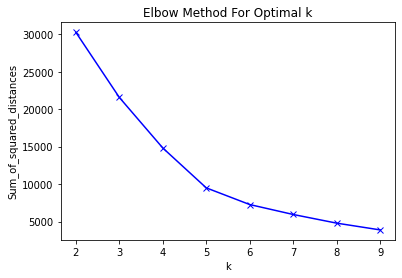

In [82]:
plt.plot(range_n_clusters, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

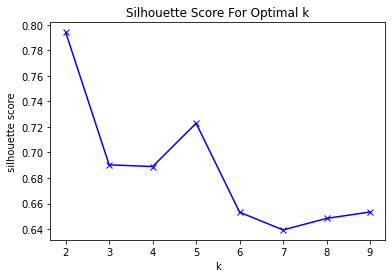

In [83]:
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score For Optimal k')
plt.show()

According to both methods, the optimum value for the number of clusters is **4**.
Now we add the **cluster label** column in our dataframes.

In [84]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

melbourne_merged = neighborhoods_venues_sorted

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

melbourne_merged = melbourne_merged.join(airbnb_zip_df2.set_index('suburb'), on='Neighborhood')

The "**most common venues**" representation will help us to understand better the clustering obtained by our model :

In [85]:
melbourne_merged.head() # check the last columns

Cluster Labels                                   Neighborhood  \
0               1              Abbotsford, Abbotsford, Melbourne   
1               0  Airport West, Keilor Park, Niddrie, Melbourne   
2               1                          Alphington, Fairfield   
3               1                                   Altona North   
4               3                    Altona, Melbourne, Seaholme   

  1st Most Common Venue 2nd Most Common Venue   3rd Most Common Venue  \
0                  Café                   Pub  Thrift / Vintage Store   
1         Grocery Store                  Park       Fish & Chips Shop   
2           Sports Club                  Café             Gas Station   
3      Business Service           Zoo Exhibit             Fish Market   
4          Hockey Field           Pizza Place     Egyptian Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0        Farmers Market     Convenience Store         Women's Store   
1           Event Space    Falafel Restaurant                  Farm   
2                   Bar          Cupcake Shop          Dance Studio   
3    Falafel Restaurant                  Farm        Farmers Market   
4           Event Space    Falafel Restaurant                  Farm   

  7th Most Common Venue 8th Most Common Venue          9th Most Common Venue  \
0       Cultural Center   Japanese Restaurant  Vegetarian / Vegan Restaurant   
1        Farmers Market  Fast Food Restaurant                    Fish Market   
2      Football Stadium            Food Truck                     Food Court   
3  Fast Food Restaurant     Fish & Chips Shop                    Flea Market   
4        Farmers Market  Fast Food Restaurant              Fish & Chips Shop   

  10th Most Common Venue  zipcode   Latitude   Longitude  
0                 Garden     3067 -37.803706  144.999930  
1      French Restaurant     3042 -37.729110  144.879564  
2      Food & Drink Shop     3078 -37.784305  145.022333  
3         Cosmetics Shop     3025 -37.838400  144.831738  
4            Zoo Exhibit     3018 -37.863255  144.822074

In [86]:
melbourne_merged.shape

(202, 15)

In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['Latitude'], melbourne_merged['Longitude'], melbourne_merged['Neighborhood'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster 0 : green neighborhoods : cafés & parks

In [88]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 0, melbourne_merged.columns[[1] + list(range(2, melbourne_merged.shape[1]))]]

Neighborhood  \
1        Airport West, Keilor Park, Niddrie, Melbourne   
10                                        Balwyn North   
12                               Beaumaris, Black Rock   
18       Bonbeach, Chelsea, Edithvale, Chelsea Heights   
21                                           Braybrook   
51                                       Diamond Creek   
68                  Glen Iris, Glen Iris, Victoria, AU   
70             Greensborough, Saint Helena, Briar Hill   
74                               Hampton East, Hampton   
83          Ivanhoe, Ivanhoe East, Ivanhoe (Melbourne)   
89                                                 Kew   
90                    Kew East, Kew East, Victoria, AU   
115  Melbourne, St Kilda, Saint Kilda, South Melbou...   
129                                           Mulgrave   
130                 Murrumbeena, Glen Huntly, Carnegie   
150  Research, Eltham, Eltham North, Melbourne (Elt...   
153                           Ringwood East, Heathmont   
156  Rosanna, Heidelberg, Eaglemont, Viewbank, HEID...   
198                                         Wonga Park   

          1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
1                 Grocery Store                  Park      Fish & Chips Shop   
10                         Café                  Park            Pizza Place   
12            Fish & Chips Shop                  Park        Thai Restaurant   
18                          Pub            Playground     Athletics & Sports   
21                         Park     Convenience Store  Vietnamese Restaurant   
51                 Home Service                  Park            Fish Market   
68            Convenience Store               Dog Run                   Café   
70                          Pub           Music Store                   Café   
74                  Sports Club            Playground                   Café   
83                         Café                  Park     Spanish Restaurant   
89                         Park                  Café        Thai Restaurant   
90                  Golf Course                  Park          Shopping Mall   
115                        Park      Botanical Garden          Grocery Store   
129           Electronics Store  Arts & Entertainment                 Bakery   
130          Light Rail Station                  Pool             Playground   
150  Construction & Landscaping                  Park           Home Service   
153                        Café           Pizza Place                   Park   
156                        Park     Fish & Chips Shop                Theater   
198                        Park          Tennis Court      Fish & Chips Shop   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1                Event Space    Falafel Restaurant                  Farm   
10      Fast Food Restaurant           Event Space    Falafel Restaurant   
12              Home Service  Fast Food Restaurant           Event Space   
18                      Park          Soccer Field           Flea Market   
21                    Bakery       Cultural Center          Cupcake Shop   
51        Falafel Restaurant                  Farm        Farmers Market   
68                      Park     Food & Drink Shop                  Food   
70        Mexican Restaurant                  Park     Fish & Chips Shop   
74          Basketball Court                 Track                  Park   
83         Fish & Chips Shop           Event Space    Falafel Restaurant   
89      Gym / Fitness Center    Light Rail Station  Fast Food Restaurant   
90   Health & Beauty Service   Egyptian Restaurant     Electronics Store   
115            Movie Theater                Museum                Garden   
129                     Café                  Park     Food & Drink Shop   
130                     Park           Coffee Shop  Fast Food Restaurant   
150              Zoo Exhibit           Fish Market    Falafel Re

## Cluster 1 : lively neighborhoods : cafés, pubs & bars

In [89]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 1, melbourne_merged.columns[[1] + list(range(2, melbourne_merged.shape[1]))]]

Neighborhood  1st Most Common Venue  \
0                    Abbotsford, Abbotsford, Melbourne                   Café   
2                                Alphington, Fairfield            Sports Club   
3                                         Altona North       Business Service   
5                             Armadale, Armadale North                   Café   
6                                   Ashwood, Ashburton               Pharmacy   
..                                                 ...                    ...   
196  Windsor, Prahran, Praharan, Melbourne, Prahran...                   Café   
197                                            Wollert  Australian Restaurant   
199  Yarra Glen, Christmas Hills, Dixons Creek, Ste...            Coffee Shop   
200   Yarra Junction, Gladysdale, Powelltown, Gilderoy            Coffee Shop   
201                                         Yarraville                   Park   

    2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
0                     Pub  Thrift / Vintage Store        Farmers Market   
2                    Café             Gas Station                   Bar   
3             Zoo Exhibit             Fish Market    Falafel Restaurant   
5       Convenience Store           Train Station         Grocery Store   
6                    Café         Thai Restaurant  Fast Food Restaurant   
..                    ...                     ...                   ...   
196                   Bar         Thai Restaurant           Pizza Place   
197        Soccer Stadium             Zoo Exhibit           Fish Market   
199                   Bar            Cocktail Bar          Burger Joint   
200                   Bar            Cocktail Bar          Burger Joint   
201         Deli / Bodega          Sandwich Place         Shopping Mall   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0       Convenience Store         Women's Store       Cultural Center   
2            Cupcake Shop          Dance Studio      Football Stadium   
3                    Farm        Farmers Market  Fast Food Restaurant   
5          Breakfast Spot          Dance Studio      Football Stadium   
6          Sandwich Place          Liquor Store    Italian Restaurant   
..                    ...                   ...                   ...   
196   Japanese Restaurant    Italian Restaurant   Dumpling Restaurant   
197    Falafel Restaurant                  Farm        Farmers Market   
199                  Café               Theater                   Gym   
200                  Café               Theater                   Gym   
201            Skate Park            Food Truck    Miscellaneous Shop   

    8th Most Common Venue          9th Most Common Venue  \
0     Japanese Restaurant  Vegetarian / Vegan Restaurant   
2              Food Truck                     Food Court   
3       Fish & Chips Shop                    Flea Market   
5              Food Truck                     Food Court   
6       Fish & Chips Shop                    Supermarket   
..                    ...                            ...   
196          Burger Joint              Fish & Chips Shop   
197  Fast Food Restaurant              Fish & Chips Shop   
199          Dessert Shop                  Shopping Mall   
200          Dessert Shop                  Shopping Mall   
201           Flea Market                    Fish Market   

    10th Most Common Venue  zipcode   Latitude   Longitude  
0                   Garden     3067 -37.803706  144.999930  
2        Food & Drink Shop     3078 -37.784305  145.022333  
3           Cosmetics Shop     3025 -37.838400  144.831738  
5        Food & Drink Shop     3143 -37.857685  145.019494  
6         Kebab Restaurant     3147 -37.866320  145.093609  
..                     ...      ...        ...         ...  
196         Sandwich Place     3181 -37.852930  144.996932  
197            Flea Market     3750 -37.621863  145.023300  
199               Bou

## Cluster 2 : zoo 

In [90]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 2, melbourne_merged.columns[[1] + list(range(2, melbourne_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
57                                    Endeavour Hills                  Park   
69  Glen Waverley, Wheelers Hill, melbourne, Wheelers                  Park   
80  Heidelberg Heights, Heidelberg West, Bellfield...                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
57           Zoo Exhibit           Fish Market    Falafel Restaurant   
69           Zoo Exhibit           Fish Market    Falafel Restaurant   
80           Zoo Exhibit           Fish Market    Falafel Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
57                  Farm        Farmers Market  Fast Food Restaurant   
69                  Farm        Farmers Market  Fast Food Restaurant   
80                  Farm        Farmers Market  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
57     Fish & Chips Shop           Flea Market         Cosmetics Shop   
69     Fish & Chips Shop           Flea Market         Cosmetics Shop   
80     Fish & Chips Shop           Flea Market         Cosmetics Shop   

    zipcode   Latitude   Longitude  
57     3802 -37.969005  145.258409  
69     3150 -37.891721  145.175660  
80     3081 -37.742465  145.045725

## Cluster 3 : pizza places & fast foods

In [91]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 3, melbourne_merged.columns[[1] + list(range(2, melbourne_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
4    Altona, Melbourne, Seaholme          Hockey Field           Pizza Place   
75                  Hampton Park           Pizza Place           Zoo Exhibit   
119                      Mitcham           Pizza Place        Ice Cream Shop   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
4     Egyptian Restaurant           Event Space    Falafel Restaurant   
75            Fish Market    Falafel Restaurant                  Farm   
119       Badminton Court           Zoo Exhibit     Fish & Chips Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4                    Farm        Farmers Market  Fast Food Restaurant   
75         Farmers Market  Fast Food Restaurant     Fish & Chips Shop   
119           Event Space    Falafel Restaurant                  Farm   

    9th Most Common Venue 10th Most Common Venue  zipcode   Latitude  \
4       Fish & Chips Shop            Zoo Exhibit     3018 -37.863255   
75            Flea Market      Electronics Store     3976 -38.042840   
119        Farmers Market   Fast Food Restaurant     3132 -37.816950   

      Longitude  
4    144.822074  
75   145.267635  
119  145.199719

## Cluster 4 : suburbs

In [94]:
melbourne_merged.loc[melbourne_merged['Cluster Labels'] == 4, melbourne_merged.columns[[1] + list(range(2, melbourne_merged.shape[1]))]]

Neighborhood      1st Most Common Venue  \
7                      Avondale Heights                     Bakery   
13   Belgrave, Belgrave Heights, Tecoma                     Bakery   
64           Frankston South, Frankston                     Bakery   
107           Meadow Heights, Melbourne  Middle Eastern Restaurant   
117                             Mentone                     Bakery   
144      Pascoe Vale South, Pascoe Vale                     Bakery   
151                           Reservoir                     Bakery   
162  Seabrook, Altona Meadows, Laverton                     Bakery   
194                    Williams Landing         Chinese Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
7             Pizza Place          Dance Studio     Electronics Store   
13              BBQ Joint   Egyptian Restaurant           Event Space   
64               Pharmacy  Fast Food Restaurant           Pizza Place   
107           Pizza Place                Bakery         Grocery Store   
117           Snack Place    Chinese Restaurant                  Café   
144          Liquor Store           Supermarket                  Café   
151         Grocery Store            Restaurant  Fast Food Restaurant   
162          Liquor Store           Supermarket      Department Store   
194                Bakery         Shopping Mall     Korean Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
7      Falafel Restaurant                  Farm        Farmers Market   
13     Falafel Restaurant                  Farm        Farmers Market   
64    Egyptian Restaurant           Event Space    Falafel Restaurant   
107         Shopping Mall     Fish & Chips Shop    Falafel Restaurant   
117           Pizza Place    Falafel Restaurant                  Farm   
144           Pizza Place           Zoo Exhibit     Fish & Chips Shop   
151           Coffee Shop     Fish & Chips Shop           Event Space   
162         Shopping Mall      Asian Restaurant           Zoo Exhibit   
194  Fast Food Restaurant           Event Space    Falafel Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
7    Fast Food Restaurant     Fish & Chips Shop            Fish Market   
13   Fast Food Restaurant     Fish & Chips Shop            Fish Market   
64                   Farm        Farmers Market      Fish & Chips Shop   
107                  Farm        Farmers Market   Fast Food Restaurant   
117        Farmers Market  Fast Food Restaurant      Fish & Chips Shop   
144                  Farm        Farmers Market   Fast Food Restaurant   
151    Falafel Restaurant                  Farm         Farmers Market   
162     Fish & Chips Shop                  Farm         Farmers Market   
194                  Farm        Farmers Market      Fish & Chips Shop   

     zipcode   Latitude   Longitude  
7       3034 -37.761743  144.864779  
13      3160 -37.926362  145.356570  
64      3199 -38.161957  145.134836  
107     3048 -37.652355  144.924383  
117     3194 -37.982650  145.092114  
144     3044 -37.733552  144.935830  
151     3073 -37.712335  145.002308  
162     3028 -37.872110  144.771360  
194     3027 -37.863151  144.744367

In [92]:
airbnb_clustered = airbnb_df

airbnb_clustered = airbnb_clustered.join(melbourne_merged.set_index('zipcode'), on='zipcode')

airbnb_clustered.shape

(17492, 41)

In [95]:
airbnb_grouped = airbnb_clustered.groupby('Cluster Labels').mean().reset_index()

airbnb_grouped[['Cluster Labels','min_income_per_year']].head(10)

Cluster Labels  min_income_per_year
0             0.0          5977.616625
1             1.0          6437.104759
2             2.0          4075.536877
3             3.0          2446.518750
4             4.0          4562.968560

In [96]:
from folium.plugins import FastMarkerCluster

airbnb_clustered.dropna(subset=['Cluster Labels'], axis=0, inplace=True)

airbnb_clustered['Cluster Labels'] = airbnb_clustered['Cluster Labels'].astype('int')

subset_of_df = airbnb_clustered.sample(n=2000)

# create map
airbnb_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
                                            
markers_colors = []
                                            
for lat, lon, cluster, income in zip(subset_of_df['latitude'], subset_of_df['longitude'], subset_of_df['Cluster Labels'], subset_of_df['min_income_per_year']):
    label = folium.Popup(' Cluster ' + str(cluster) + ' yearly income ' + str(int(income)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(airbnb_map_clusters)
    
airbnb_map_clusters

In [97]:
housing_clustered = housing_df

housing_clustered = housing_clustered.join(melbourne_merged.set_index('zipcode'), on='Postcode')

housing_clustered.shape

(10502, 35)

In [98]:
housing_grouped = housing_clustered.groupby('Cluster Labels').median()

housing_grouped.head(10)

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
Cluster Labels                                                                  
0.0               3.0  1100000.0      10.4    3104.0       3.0       2.0  2.0   
1.0               3.0   902000.0       9.2    3078.0       3.0       2.0  2.0   
2.0               3.0   859000.0      10.5    3081.0       3.0       1.0  2.0   
3.0               3.0   910400.0      13.8    3018.0       3.0       2.0  2.0   
4.0               3.0   708000.0      11.2    3073.0       3.0       1.0  2.0   

                Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
Cluster Labels                                                             
0.0                567.0         152.0     1970.0  -37.79970  145.056900   
1.0                351.0         132.0     1970.0  -37.80670  144.988630   
2.0                592.0         119.0     1970.0  -37.75072  145.056400   
3.0                370.5         136.0     1974.5  -37.86110  144.843135   
4.0                482.0         119.0     1970.0  -37.72380  144.997000   

                Propertycount   Latitude   Longitude  
Cluster Labels                                        
0.0                    5454.0 -37.801520  145.056660  
1.0                    6763.0 -37.809700  144.988150  
2.0                    2947.0 -37.742465  145.045725  
3.0                    5301.0 -37.863255  144.822074  
4.0                    7630.0 -37.733552  145.002308

In [99]:
housing_clustered.dropna(subset=['Cluster Labels'], axis=0, inplace=True)

housing_clustered['Cluster Labels'] = housing_clustered['Cluster Labels'].astype('int')

subset_of_df = housing_clustered.sample(n=1000)

# create map
housing_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
                                            
markers_colors = []
                                            
for lat, lon, cluster, price in zip(subset_of_df['Lattitude'], subset_of_df['Longtitude'], subset_of_df['Cluster Labels'], subset_of_df['Price']):
    label = folium.Popup(' Cluster ' + str(cluster) + ' price ' + str(int(price)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(housing_map_clusters)
    
housing_map_clusters

In [101]:
airbnb_clustered.to_csv(r'airbnb_clustered.csv',index=False)